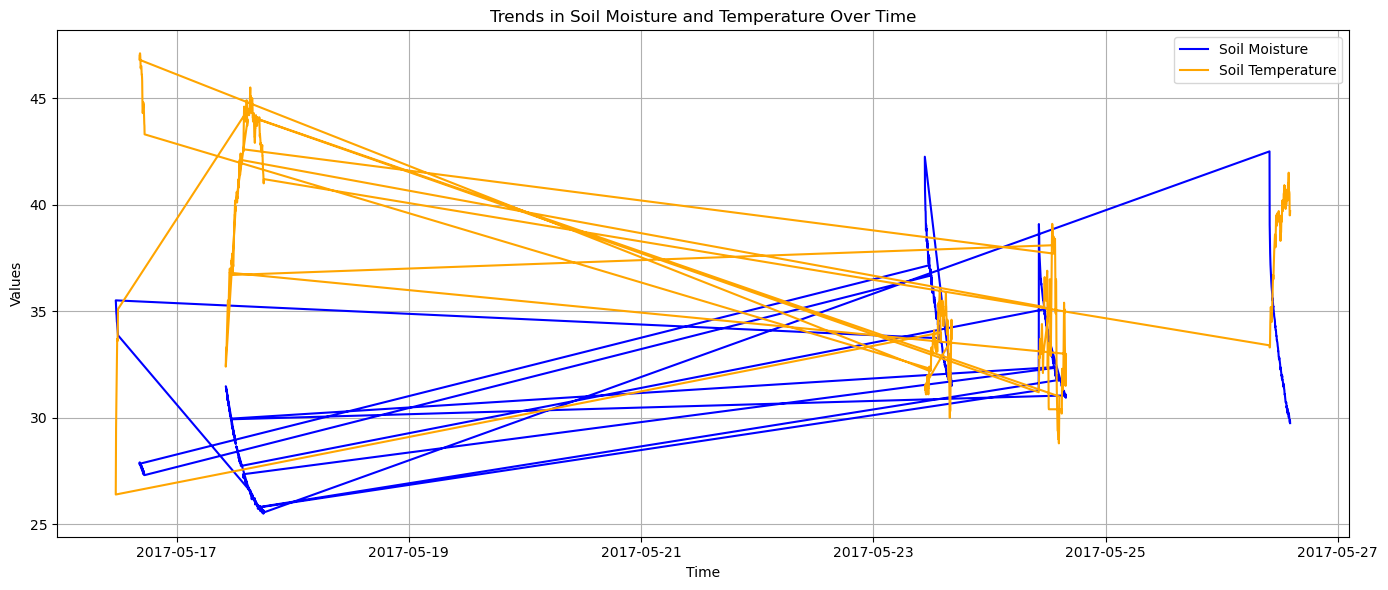

Top correlations with Soil Moisture:
soil_moisture    1.000000
index           -0.140205
462             -0.648569
470             -0.654644
486             -0.656002
482             -0.656447
Name: soil_moisture, dtype: float64

Top correlations with Soil Temperature:
soil_temperature    1.000000
454                 0.657049
950                 0.656659
946                 0.653192
942                 0.649930
938                 0.646463
Name: soil_temperature, dtype: float64


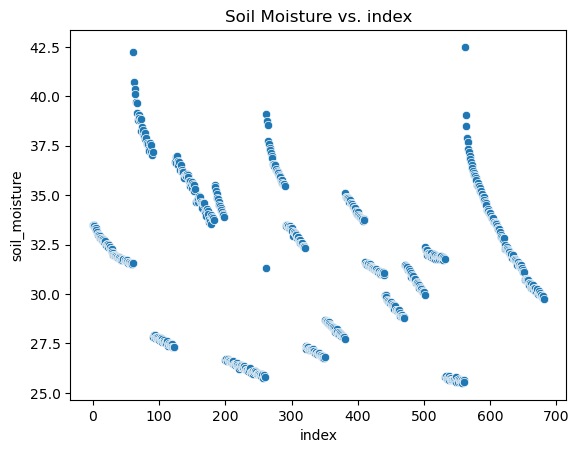

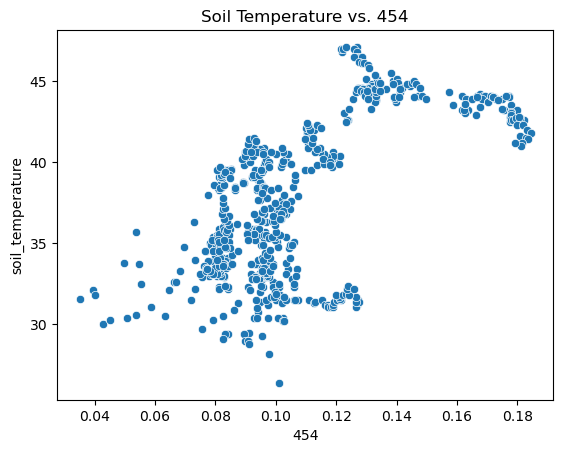

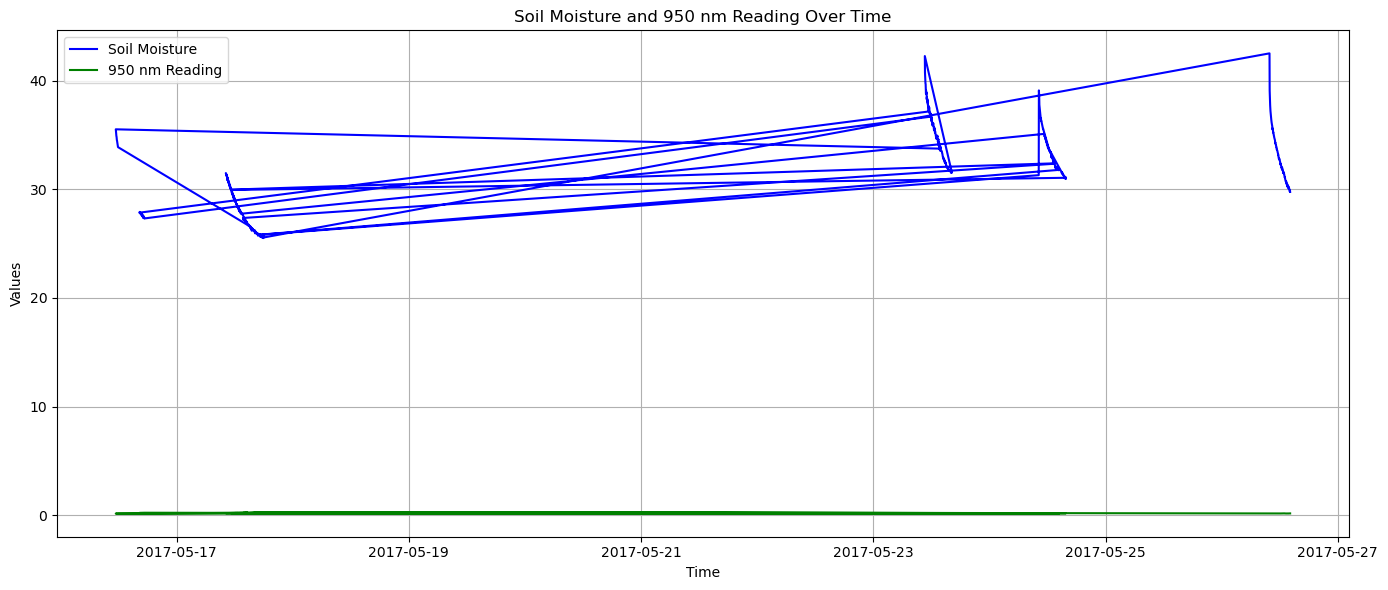

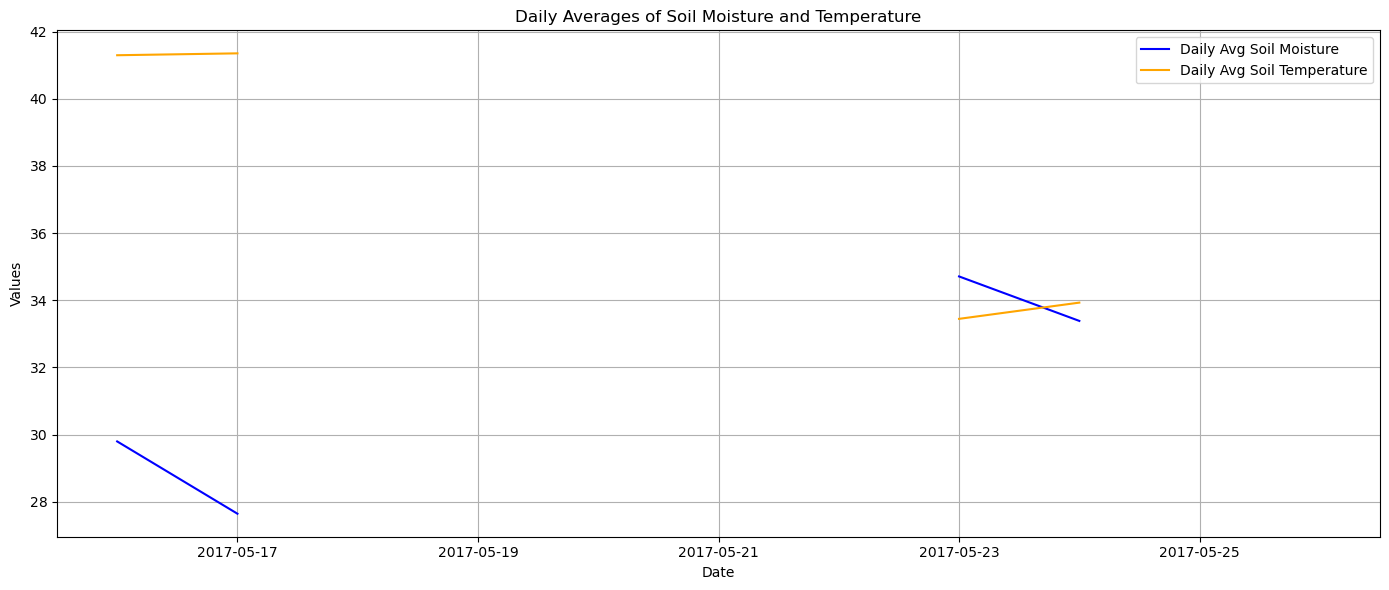

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "Downloads/archive/soil_moisture.csv"
soil_moisture_data = pd.read_csv(csv_file_path)

soil_moisture_data['datetime'] = pd.to_datetime(soil_moisture_data['datetime'])
soil_moisture_data.set_index('datetime', inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(soil_moisture_data.index, soil_moisture_data['soil_moisture'], label='Soil Moisture', color='blue')
plt.plot(soil_moisture_data.index, soil_moisture_data['soil_temperature'], label='Soil Temperature', color='orange')
plt.title('Trends in Soil Moisture and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


correlations = soil_moisture_data.corr()

# Extract correlations for soil moisture and temperature
moisture_corr = correlations['soil_moisture'].sort_values(ascending=False)
temperature_corr = correlations['soil_temperature'].sort_values(ascending=False)

# Display top 5 correlated variables for soil moisture and temperature
print("Top correlations with Soil Moisture:")
print(moisture_corr.head(6))
print("\nTop correlations with Soil Temperature:")
print(temperature_corr.head(6))

# Step 4: Scatter Plot for Relationships
# Scatter plot for soil moisture vs. top nanometer reading
top_nano_column = moisture_corr.index[1]  # Top correlated nanometer column
sns.scatterplot(data=soil_moisture_data, x=top_nano_column, y='soil_moisture')
plt.title(f'Soil Moisture vs. {top_nano_column}')
plt.show()

# Scatter plot for soil temperature vs. top nanometer reading
top_nano_column_temp = temperature_corr.index[1]
sns.scatterplot(data=soil_moisture_data, x=top_nano_column_temp, y='soil_temperature')
plt.title(f'Soil Temperature vs. {top_nano_column_temp}')
plt.show()

# Step 5: Time Series of Specific Nanometer Reading
plt.figure(figsize=(14, 6))
plt.plot(soil_moisture_data.index, soil_moisture_data['soil_moisture'], label='Soil Moisture', color='blue')
plt.plot(soil_moisture_data.index, soil_moisture_data['950'], label='950 nm Reading', color='green')
plt.title('Soil Moisture and 950 nm Reading Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Aggregation and Visualization
# Aggregate data by day
daily_avg = soil_moisture_data.resample('D').mean()

# Plot daily averages of soil moisture and temperature
plt.figure(figsize=(14, 6))
plt.plot(daily_avg.index, daily_avg['soil_moisture'], label='Daily Avg Soil Moisture', color='blue')
plt.plot(daily_avg.index, daily_avg['soil_temperature'], label='Daily Avg Soil Temperature', color='orange')
plt.title('Daily Averages of Soil Moisture and Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


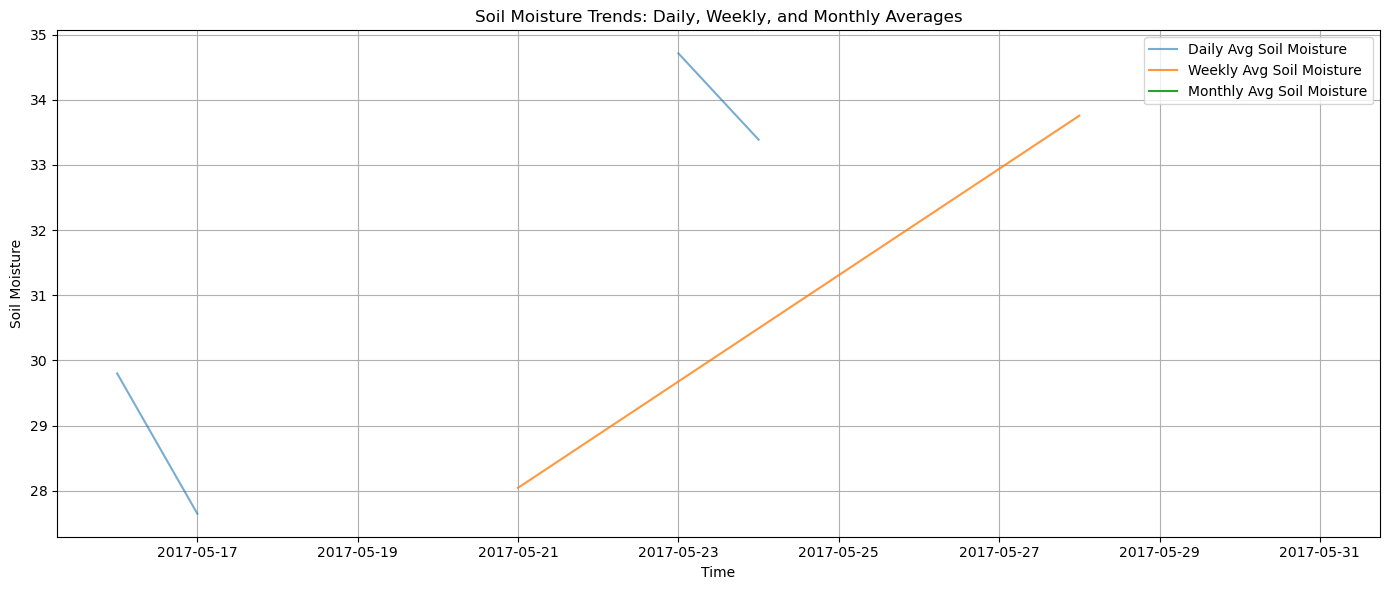

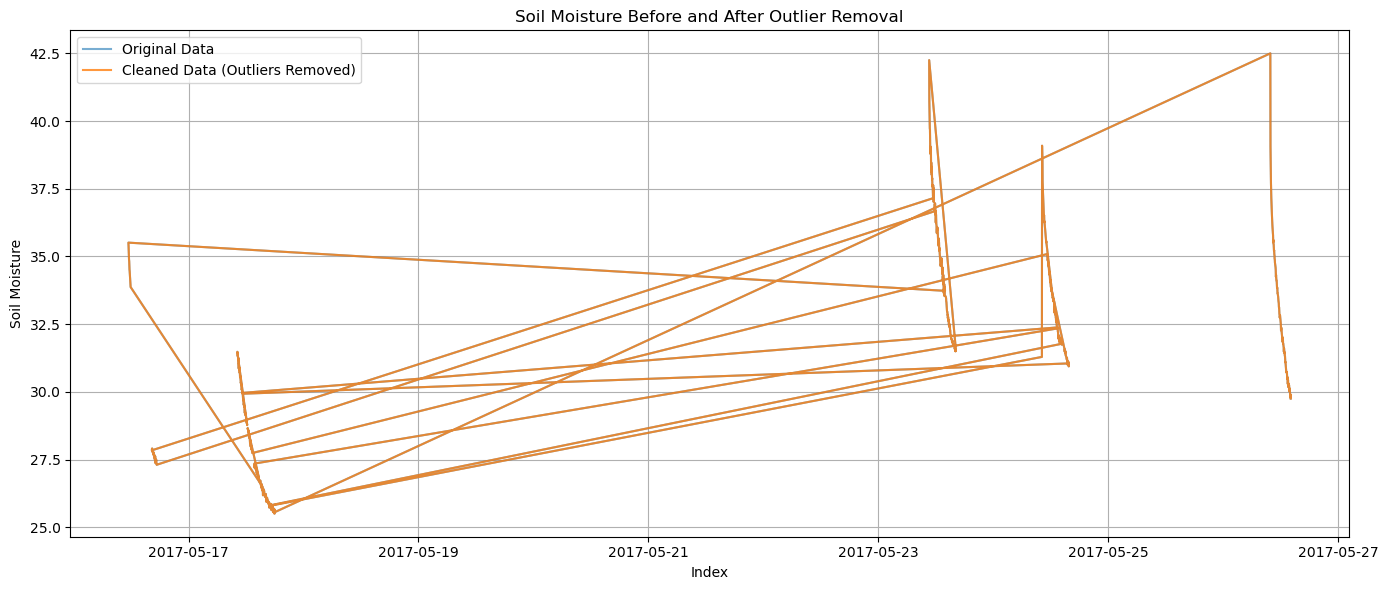

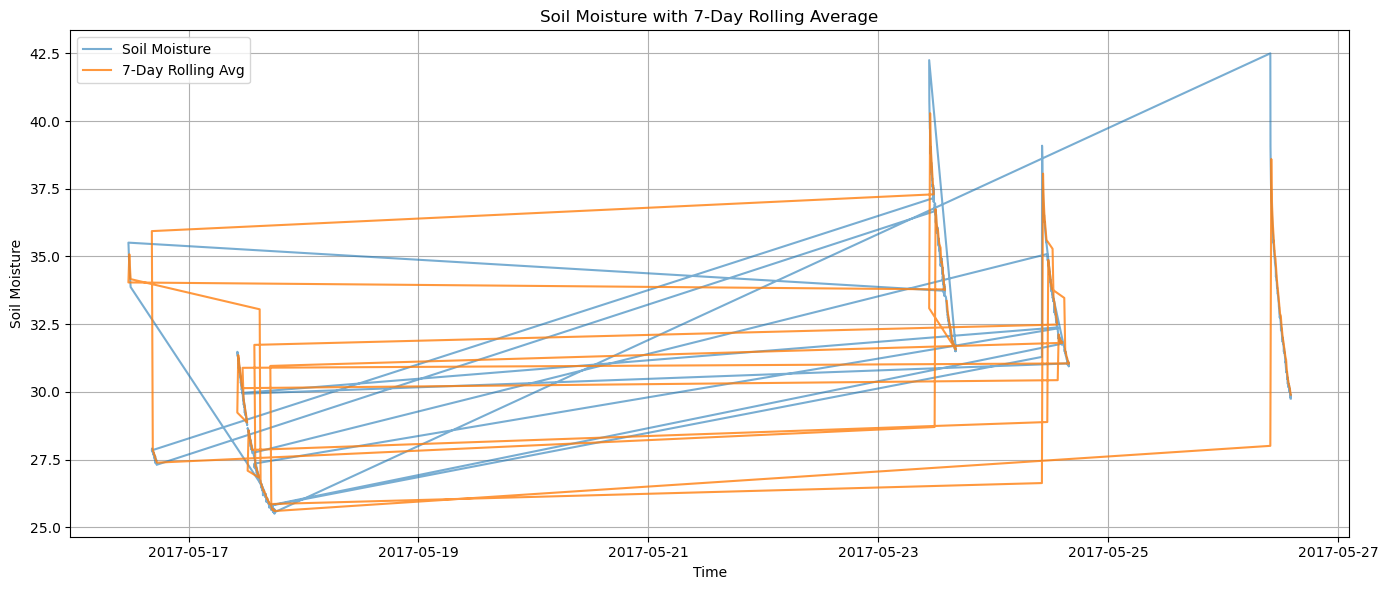

Top 10 Soil Moisture Readings:
                     soil_moisture
datetime                          
2017-05-26 09:52:28          42.50
2017-05-23 10:38:26          42.25
2017-05-23 10:40:26          40.72
2017-05-23 10:42:26          40.39
2017-05-23 10:44:26          40.11
2017-05-23 10:46:26          39.73
2017-05-23 10:48:26          39.68
2017-05-23 10:50:26          39.14
2017-05-24 10:12:47          39.09
2017-05-23 10:54:26          39.06


In [15]:

# Daily average
daily_avg = soil_moisture_data.resample('D').mean()

# Weekly average
weekly_avg = soil_moisture_data.resample('W').mean()

# Monthly average
monthly_avg = soil_moisture_data.resample('ME').mean()

# Visualize daily, weekly, and monthly averages
plt.figure(figsize=(14, 6))
plt.plot(daily_avg.index, daily_avg['soil_moisture'], label='Daily Avg Soil Moisture', alpha=0.6)
plt.plot(weekly_avg.index, weekly_avg['soil_moisture'], label='Weekly Avg Soil Moisture', alpha=0.8)
plt.plot(monthly_avg.index, monthly_avg['soil_moisture'], label='Monthly Avg Soil Moisture', alpha=1.0)
plt.title('Soil Moisture Trends: Daily, Weekly, and Monthly Averages')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Outlier Detection using Interquartile Range (IQR)
# Define a function to detect and filter outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for soil moisture
cleaned_data = detect_outliers(soil_moisture_data, 'soil_moisture')

# Visualize before and after outlier removal
plt.figure(figsize=(14, 6))
plt.plot(soil_moisture_data['soil_moisture'], label='Original Data', alpha=0.6)
plt.plot(cleaned_data['soil_moisture'], label='Cleaned Data (Outliers Removed)', alpha=0.8)
plt.title('Soil Moisture Before and After Outlier Removal')
plt.xlabel('Index')
plt.ylabel('Soil Moisture')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Feature Engineering
# Create additional features
soil_moisture_data['hour'] = soil_moisture_data.index.hour  # Hour of the day
soil_moisture_data['day_of_week'] = soil_moisture_data.index.dayofweek  # Day of the week
soil_moisture_data['month'] = soil_moisture_data.index.month  # Month of the year

# Calculate rolling averages (e.g., 7-day rolling average for soil moisture)
soil_moisture_data['rolling_avg_7d'] = soil_moisture_data['soil_moisture'].rolling(window=7).mean()

# Visualize the rolling average
plt.figure(figsize=(14, 6))
plt.plot(soil_moisture_data.index, soil_moisture_data['soil_moisture'], label='Soil Moisture', alpha=0.6)
plt.plot(soil_moisture_data.index, soil_moisture_data['rolling_avg_7d'], label='7-Day Rolling Avg', alpha=0.8)
plt.title('Soil Moisture with 7-Day Rolling Average')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Identify Peak Trends
# Find the highest soil moisture values and their corresponding dates
top_moisture = soil_moisture_data.nlargest(10, 'soil_moisture')[['soil_moisture']]

print("Top 10 Soil Moisture Readings:")
print(top_moisture)